<a href="https://colab.research.google.com/github/Gaoqiaoxinye/novel_file/blob/main/Machine_Learning_Pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Configuration Preparation

In [14]:
!pip install imbalanced-learn==0.9.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.1/199.1 kB 2.5 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.12.2
    Uninstalling imbalanced-learn-0.12.2:
      Successfully uninstalled imbalanced-learn-0.12.2


In [2]:
!pip install scikit-learn
import sklearn
print(sklearn.__version__)

1.2.2


In [3]:
!pip install --upgrade scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 49.4 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [15]:
%reset
# restart the kernel

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


## Data preparation

In [16]:
# Select the labels for the following analysis.
target_names = ["non-severe pneumonia","severe pneumonia"]
# target_names = ["non pneumonia", "pneumonia"]

Procedure:
1. drop the columns with all elements being NaN values;
2. drop the columns with a high proportion of missing values;
3. complement the missing values by 'mean' strategy;
4. calculate the ratio of labels.

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Import the DataFrame (replace 'file.xlsx' with your actual file path)
df = pd.read_excel('for_analysis.xlsx', sheet_name="pneumonia")
df = df.iloc[:,1:] # remove the column title being "Patient_ID"
df = df.dropna(axis=1, how="all")

# Processing columns and rows with giant missing value counts.
# calculate the percent of missing values for each column
missing_percent_column =df.isnull().mean()
# Calculate the percentage of missing values for each row
missing_percent_row = df.isnull().mean(axis=1)
# set the cutoffs
cutoff_column = 0.75
cutoff_row = 0.9
# identify and remove the columns with the value greateer than the cutoff
columns_to_drop = missing_percent_column[missing_percent_column >cutoff_column].index
# drop these columns from the dataframe
df.drop(columns=columns_to_drop, inplace = True)
# Filter rows based on the cutoff
df = df[missing_percent_row <= cutoff_row]

# Processing missing values.
# Handle NaN values using imputation, with the preliminary condition being that all labels are valid
# The fit_transform method combines two steps:
# fit: It learns about the data (e.g., computes mean, median, etc.) based on the non-missing values.
# transform: It applies the learned information to fill in the missing values.
imputer = SimpleImputer(strategy='mean')
df.iloc[:, 1:]  = imputer.fit_transform(df.iloc[:, 1:])
# raw code: df.iloc[:, 2:] = imputer.fit_transform(df.iloc[:, 2:])
# Tips: the returned values of .fit_transform is a Numpy array, not a pandas DataFrame

# If 'df' is a NumPy array, convert it to a pandas DataFrame
# Convert the imputed data back to a pandas DataFrame
# df = pd.DataFrame(df, columns=df.cloumns)

# Preprocess the data (scaling)
scaler = StandardScaler()  # Create an instance of the StandardScaler class.
df.iloc[:, 1:] = scaler.fit_transform(df.iloc[:, 1:])  # Fit the scaler to the data and then transform it.
# preparing the dataset X (which could be a set of features in your dataset)
# so that it can be effectively used in machine learning models by giving each feature a mean of 0 and a variance of 1,
# which helps in speeding up the convergence of learning algorithms.


Now, we have gotton the novel DataFrame for the following steps.

In [18]:
df.shape

(5446, 71)

In [19]:
df

,pneumonia,白细胞计数,中性粒细胞比率,淋巴细胞比率,单核细胞比率,嗜酸粒细胞比率,嗜碱粒细胞比率,中性粒细胞计数,淋巴细胞计数,单核细胞计数,...,二氧化碳总量,氧饱和度,凝血酶原时间-INR值,纤维蛋白原,凝血酶原时间,活化部分凝血活酶时间,凝血酶时间,D-二聚体,纤维蛋白降解产物,白介素6
0,1,1.048237,-0.761565,0.066310,3.815783,-0.206364,-0.990071,-0.004856,0.897447,4.845495,...,0.000000,3.246104e-15,1.191831,-1.103085,9.219479e-01,-1.437917e+00,-1.204609,0.836619,2.684020e-01,-1.933533e-01
1,0,-1.485031,-0.285387,0.434554,-0.459267,-0.246060,0.280581,-1.021209,-0.944041,-1.184726,...,0.000000,3.246104e-15,-0.678573,-1.862449,-8.930557e-01,-3.705185e-01,1.062409,-0.609340,-4.246412e-01,-3.445052e-17
2,1,3.418818,1.479573,-1.557309,0.208709,-0.523929,-0.566520,4.132724,-0.222547,2.999509,...,0.000000,3.246104e-15,-0.390818,1.971111,-5.300550e-01,1.409436e-01,1.425131,-0.324448,-2.151165e-01,-3.445052e-17
3,0,-0.137054,0.956814,-1.044000,0.395743,-0.563624,0.704132,0.340945,-0.713331,0.189508,...,0.594184,3.423401e-01,0.328568,-0.833634,7.494618e-02,-1.104355e+00,-1.023248,-0.195441,-3.762894e-01,-2.593411e-01
4,1,0.037254,-0.378553,0.546143,-1.528030,1.262371,0.280581,-0.230378,0.465390,-1.020638,...,-2.065492,5.707643e-01,0.760199,-0.894873,5.589471e-01,3.855558e-01,-1.023248,-0.555586,-3.762894e-01,-2.256926e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5617,0,0.167403,0.242548,-0.112232,-0.218796,-0.682711,-0.566520,0.193604,0.096253,0.004909,...,-0.403195,7.991886e-01,0.000000,0.000000,2.149396e-15,-7.900340e-16,0.000000,0.000000,7.157511e-17,-3.445052e-17
5618,1,0.729835,0.139031,-0.073176,-0.218796,-0.365146,1.551233,0.506328,0.524116,0.394618,...,-0.403195,3.423401e-01,0.000000,0.000000,2.149396e-15,-7.900340e-16,0.000000,0.000000,7.157511e-17,-3.445052e-17
5619,1,-0.069655,1.572738,-1.562888,-0.111920,-0.841493,0.704132,0.713808,-1.032130,-0.097645,...,-0.070735,5.707643e-01,0.000000,0.000000,2.149396e-15,-7.900340e-16,0.000000,0.000000,7.157511e-17,-3.445052e-17
5620,1,1.836106,-1.382665,1.422116,-0.165358,0.666938,0.704132,-0.272476,3.225525,1.215056,...,-1.400573,3.423401e-01,0.000000,0.000000,2.149396e-15,-7.900340e-16,0.000000,0.000000,7.157511e-17,-3.445052e-17


## The Configuration of the training and the Validation Cohort

Split the Dataframe into training and validation cohort.

In [20]:
from sklearn.model_selection import train_test_split

# Split the DataFrame into training (80%) and validation (20%) cohorts
df_training, df_validation = train_test_split(df, test_size=0.2, random_state=42)

# Now, train_df is your training cohort DataFrame, and valid_df is your validation cohort DataFrame.

Fetch the X (features) and y (labels) for the downstream pipeline.

In [21]:
# Separate features and labels
X = df_training.iloc[:, 1:]  # Input All Features
y = df_training.iloc[:, 0]   # Labels
# 'y' is a pandas Series containing binary class labels
# Corrected and improved code for oversampling and downsampling

# Count the occurrences of each class label
counts = y.value_counts()
counts_positive = counts.get(1, 0)
counts_negative = counts.get(0, 0)

# Calculate the oversampling parameter (ratio of class labels)
oversampling_parameter = counts_positive / counts_negative

# Check if oversampling is needed
if oversampling_parameter > 1:
    # Print the recommended oversampling ratio (rounded to the nearest integer)
    recommended_oversampling = int(round(oversampling_parameter))
    print(f"The recommended oversampling ratio is: {recommended_oversampling}")
else:
    # Calculate the downsampling parameter (rounded to the nearest integer)
    downsampling_parameter = int(round(counts_negative / counts_positive))
    print(f"The recommended downsampling ratio is: {downsampling_parameter}")
print("Annotation: the need for oversampling represents the positive is more than the negative greately, and vice versa.")

The recommended oversampling ratio is: 3
Annotation: the need for oversampling represents the positive is more than the negative greately, and vice versa.


The validation cohort would finally be applied for the fitted model.

In [7]:
X_val = df_validation.iloc[:, 1:]  # Input All Features
y_val = df_validation.iloc[:, 0]   # Labels

### Make the Data Structure balanced (Optional)

**1. Oversampling**

In [22]:
from imblearn.over_sampling import SMOTE

# Assuming X and y are your features and target variable
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

# Count the occurrences of each class label after resampling
counts_res = y_res.value_counts()
counts_positive_res = counts_res.get(1, 0)
counts_negative_res = counts_res.get(0, 0)

# Calculate the oversampling parameter (ratio of class labels) after resampling
oversampling_parameter_res = counts_positive_res / counts_negative_res

# Print the raw and resampled counts and ratios
print(f"The raw counts of the positive labels are {counts_positive}, while for the negative labels are {counts_negative}, and the ratio is {oversampling_parameter:.2f}.")
print(f"The resampled counts of the positive labels are {counts_positive_res}, while for the negative labels are {counts_negative_res}, so the ratio has been altered to {oversampling_parameter_res:.2f}.")


ImportError: cannot import name 'if_delegate_has_method' from 'sklearn.utils.metaestimators' (/usr/local/lib/python3.10/dist-packages/sklearn/utils/metaestimators.py)

**2. Downsampling**

In [9]:
from imblearn.under_sampling import RandomUnderSampler

# Assuming X and y are your features and target variable
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X, y)

# Count the occurrences of each class label after resampling
counts_res = y_res.value_counts()
counts_positive_res = counts_res.get(1, 0)
counts_negative_res = counts_res.get(0, 0)

# Calculate the oversampling parameter (ratio of class labels) after resampling
oversampling_parameter_res = counts_positive_res / counts_negative_res

# Print the raw and resampled counts and ratios
print(f"The raw counts of the positive labels are {counts_positive}, while for the negative labels are {counts_negative}, and the ratio is {oversampling_parameter:.2f}.")
print(f"The resampled counts of the positive labels are {counts_positive_res}, while for the negative labels are {counts_negative_res}, so the ratio has been altered to {oversampling_parameter_res:.2f}.")


ImportError: cannot import name '_MissingValues' from 'sklearn.utils._param_validation' (/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py)

**3. Manually Adjustment**

In [ ]:

## Manually oversampling
import numpy as np

# Manual oversampling of the minority class
minority_class = (y == 1)
X_minority = X[minority_class]
y_minority = y[minority_class]

# Duplicate minority class examples
X_minority_oversampled = np.tile(X_minority, (2, 1))  # Oversample by duplicating twice
y_minority_oversampled = np.tile(y_minority, 2)

# Combine with the rest of the training data
X_res = np.vstack((X, X_minority_oversampled))
y_res = np.hstack((y, y_minority_oversampled))

Feature Engineering

In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt

# Assuming you have your own DataFrame 'df' with features and target variable
# For demonstration, let's load the iris dataset (you can replace this with your own data)
# X should contain your features, and y should be your target variable
# Adjust this part based on your actual data
X = df.drop(columns=['target_column'])  # Replace 'target_column' with your actual target column name
y = df['target_column']  # Replace 'target_column' with your actual target column name

# Univariate feature selection using F-test
selector = SelectKBest(f_classif, k=4)
selector.fit(X, y)
scores = -np.log10(selector.pvalues_)
scores /= scores.max()

# Plot feature scores
X_indices = np.arange(X.shape[-1])
plt.figure(figsize=(8, 6))
plt.bar(X_indices - 0.05, scores, width=0.2)
plt.title("Univariate Feature Selection: Feature Scores")
plt.xlabel("Feature number")
plt.ylabel(r"Univariate score ($-Log(p_{value})$)")
plt.show()

# Print selected features
selected_features = np.array(X_indices)[selector.get_support()]
print("Selected Features:", selected_features)


## Pearson Correlation

Pearson correlation measures the linear relationship between two continuous variables. It’s commonly used for feature selection.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt

# Assuming you have your own DataFrame 'df' with features and target variable
# For demonstration, let's load the iris dataset (you can replace this with your own data)
# X should contain your features, and y should be your target variable
# Adjust this part based on your actual data
X = df.drop(columns=['target_column'])  # Replace 'target_column' with your actual target column name
y = df['target_column']  # Replace 'target_column' with your actual target column name

# Univariate feature selection using F-test
selector = SelectKBest(f_classif, k=4)
selector.fit(X, y)
scores = -np.log10(selector.pvalues_)
scores /= scores.max()

# Plot feature scores
X_indices = np.arange(X.shape[-1])
plt.figure(figsize=(8, 6))
plt.bar(X_indices - 0.05, scores, width=0.2)
plt.title("Univariate Feature Selection: Feature Scores")
plt.xlabel("Feature number")
plt.ylabel(r"Univariate score ($-Log(p_{value})$)")
plt.show()

# Print selected features
selected_features = np.array(X_indices)[selector.get_support()]
print("Selected Features:", selected_features)


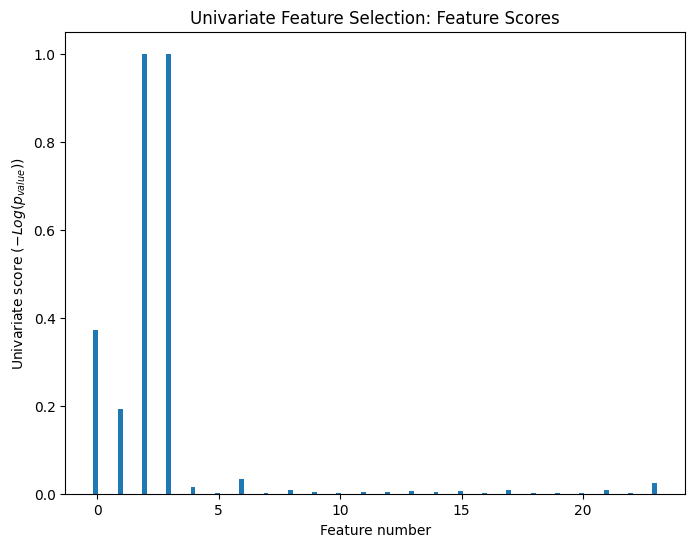

Selected Features: [0 1 2 3]


In [ ]:
import numpy as np
import pandas as pd
# from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt

# Load the dataset
X, y = load_iris(return_X_y=True)

# Create noisy features (for demonstration)
E = np.random.RandomState(42).uniform(0, 0.1, size=(X.shape[0], 20))
X = np.hstack((X, E))

# Split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

# Univariate feature selection using F-test
selector = SelectKBest(f_classif, k=4)
selector.fit(X_train, y_train)
scores = -np.log10(selector.pvalues_)
scores /= scores.max()

# Plot feature scores
X_indices = np.arange(X.shape[-1])
plt.figure(figsize=(8, 6))
plt.bar(X_indices - 0.05, scores, width=0.2)
plt.title("Univariate Feature Selection: Feature Scores")
plt.xlabel("Feature number")
plt.ylabel(r"Univariate score ($-Log(p_{value})$)")
plt.show()

# Print selected features
selected_features = np.array(X_indices)[selector.get_support()]
print("Selected Features:", selected_features)


In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Select top k features based on chi-squared test
k = 5  # Number of top features to select
chi2_selector = SelectKBest(chi2, k=k)
X_kbest = chi2_selector.fit_transform(X, y)

# Get selected feature indices and names
selected_features = chi2_selector.get_support(indices=True)
selected_feature_names = [df.feature_names[i] for i in selected_features]

print("Selected features:", selected_feature_names)

ValueError: Input X must be non-negative.

# Machine learning fabrication

## Model 1. Support Vector Machine

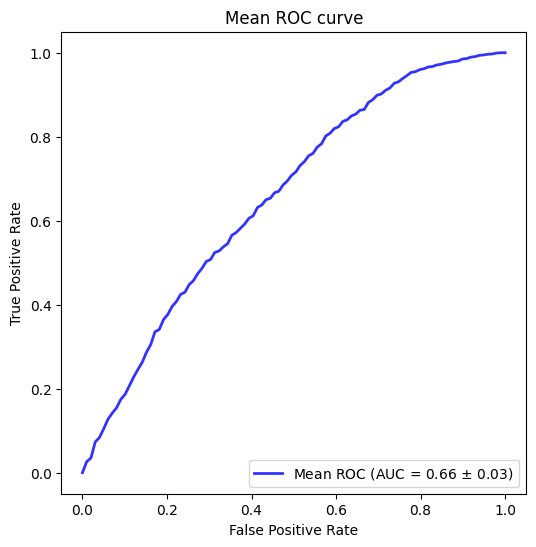

Mean F1 Score: 0.9438304858430543
Mean Accuracy: 0.8936430496149448
Mean Precision: 0.8936354358355579
Mean Recall: 1.0
Mean Specificity: 0.0006756756756756757


<Figure size 600x600 with 0 Axes>

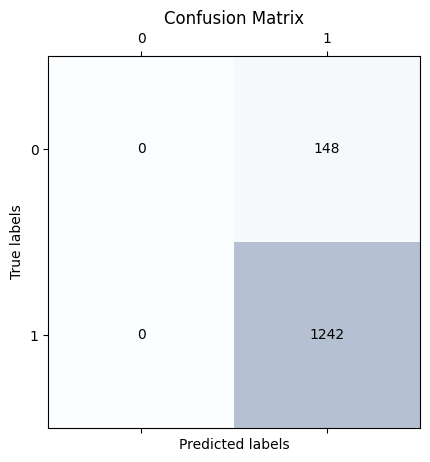

Fold 1     0.689543
Fold 2     0.654585
Fold 3     0.687162
Fold 4     0.654147
Fold 5     0.630906
Fold 6     0.658759
Fold 7     0.637681
Fold 8     0.622867
Fold 9     0.641016
Fold 10    0.702240
dtype: float64
The SVM model and metrics have been saved successfully.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc, f1_score, accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold
import joblib

# Assuming X and y are already defined and preprocessed
# X = ... # Your features
# y = ... # Your target variable

n_splits = 10
cv = StratifiedKFold(n_splits=n_splits)

classifier = SVC(probability=True)

# Initialize lists to store metrics
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

# Initialize Series to store AUC of folds
AUC_collection = pd.Series(dtype=float)

# Initialize lists to store other metrics
f1_scores = []
accuracies = []
precisions = []
recalls = []
specificities = []

for fold, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X[train], y[train])
    y_pred = classifier.predict(X[test])
    y_proba = classifier.predict_proba(X[test])[:, 1]

    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y[test], y_proba)
    roc_auc = auc(fpr, tpr)
    interp_tpr = np.interp(mean_fpr, fpr, tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(roc_auc)

    # Store AUC in Series
    AUC_collection[f'Fold {fold+1}'] = roc_auc

    # Compute other metrics
    f1_scores.append(f1_score(y[test], y_pred))
    accuracies.append(accuracy_score(y[test], y_pred))
    precisions.append(precision_score(y[test], y_pred))
    recalls.append(recall_score(y[test], y_pred))
    tn, fp, fn, tp = confusion_matrix(y[test], y_pred).ravel()
    specificity = tn / (tn+fp)
    specificities.append(specificity)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)

plt.figure(figsize=(6, 6))
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
         lw=2, alpha=0.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Mean ROC curve')
plt.legend(loc='lower right')
plt.show()

# Print the metrics
print(f'Mean F1 Score: {np.mean(f1_scores)}')
print(f'Mean Accuracy: {np.mean(accuracies)}')
print(f'Mean Precision: {np.mean(precisions)}')
print(f'Mean Recall: {np.mean(recalls)}')
print(f'Mean Specificity: {np.mean(specificities)}')

# Display the confusion matrix for the last fold
cm = confusion_matrix(y[test], y_pred)
plt.figure(figsize=(6, 6))
plt.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(x=j, y=i, s=cm[i, j], va='center', ha='center')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Print AUC collection
print(AUC_collection)

# Save the trained model to a file
joblib.dump(classifier, 'SVM_model.joblib')

# Save other metrics to a dictionary
metrics = {
    'AUC_collection': AUC_collection,
    'Mean F1 Score': np.mean(f1_scores),
    'Mean Accuracy': np.mean(accuracies),
    'Mean Precision': np.mean(precisions),
    'Mean Recall': np.mean(recalls),
    'Mean Specificity': np.mean(specificities)
}

# Save the metrics dictionary to a file
joblib.dump(metrics, 'SVM_metrics.joblib')

# Print a success message
print("The SVM model and metrics have been saved successfully.")


## Model 2. RandomForestClassifier

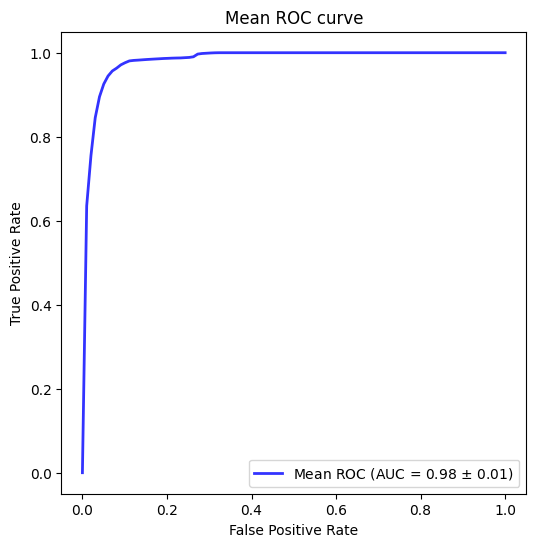

Mean F1 Score: 0.958360525448095
Mean Accuracy: 0.9223345349600981
Mean Precision: 0.9200647411941778
Mean Recall: 1.0
Mean Specificity: 0.2702702702702703


<Figure size 600x600 with 0 Axes>

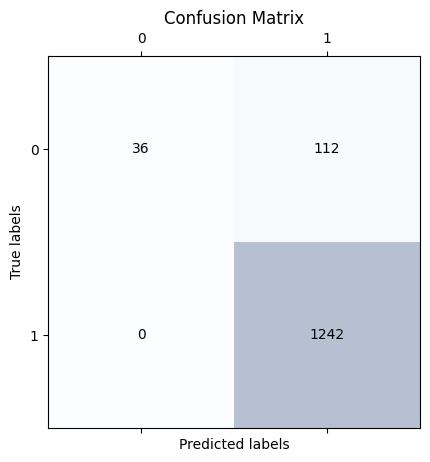

Fold 1     0.975710
Fold 2     0.990566
Fold 3     0.989022
Fold 4     0.969962
Fold 5     0.984606
Fold 6     0.979545
Fold 7     0.977456
Fold 8     0.978775
Fold 9     0.991394
Fold 10    0.995000
dtype: float64
The Random Forest Classifier model and metrics have been saved successfully.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, f1_score, accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold
import joblib

# Assuming X and y are already defined and preprocessed
# X = ... # Your features
# y = ... # Your target variable

n_splits = 10
cv = StratifiedKFold(n_splits=n_splits)

classifier = RandomForestClassifier(n_estimators=100)

# Initialize lists to store metrics
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

# Initialize Series to store AUC of folds
AUC_collection = pd.Series(dtype=float)

# Initialize lists to store other metrics
f1_scores = []
accuracies = []
precisions = []
recalls = []
specificities = []

for fold, (train, test) in enumerate(cv.split(X, y)):
    rf = classifier.fit(X[train], y[train])
    y_pred = classifier.predict(X[test])
    y_proba = classifier.predict_proba(X[test])[:, 1]

    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y[test], y_proba)
    roc_auc = auc(fpr, tpr)
    interp_tpr = np.interp(mean_fpr, fpr, tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(roc_auc)

    # Store AUC in Series
    AUC_collection[f'Fold {fold+1}'] = roc_auc

    # Compute other metrics
    f1_scores.append(f1_score(y[test], y_pred))
    accuracies.append(accuracy_score(y[test], y_pred))
    precisions.append(precision_score(y[test], y_pred))
    recalls.append(recall_score(y[test], y_pred))
    tn, fp, fn, tp = confusion_matrix(y[test], y_pred).ravel()
    specificity = tn / (tn+fp)
    specificities.append(specificity)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)

plt.figure(figsize=(6, 6))
plt.plot(mean_fpr, mean_tpr, color='blue',
         #label=r'Mean ROC (AUC = %0.2f)' % (mean_auc),
         label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
         lw=2, alpha=0.8)
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
# ax.fill_between(
#     mean_fpr,
#     tprs_lower,
#     tprs_upper,
#     color="grey",
#     alpha=0.2,
#     label=r"$\pm$ 1 std. dev.",
# )
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Mean ROC curve')
plt.legend(loc='lower right')
plt.show()

# Print the metrics
print(f'Mean F1 Score: {np.mean(f1_scores)}')
print(f'Mean Accuracy: {np.mean(accuracies)}')
print(f'Mean Precision: {np.mean(precisions)}')
print(f'Mean Recall: {np.mean(recalls)}')
print(f'Mean Specificity: {np.mean(specificities)}')

# Display the confusion matrix for the last fold
cm = confusion_matrix(y[test], y_pred)
plt.figure(figsize=(6, 6))
plt.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(x=j, y=i, s=cm[i, j], va='center', ha='center')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Print AUC collection
print(AUC_collection)

import joblib

# Save the trained model to a file
joblib.dump(classifier, 'RFC_model.joblib')

# Save other metrics to a dictionary
metrics = {
    'AUC_collection': AUC_collection,
    'Mean F1 Score': np.mean(f1_scores),
    'Mean Accuracy': np.mean(accuracies),
    'Mean Precision': np.mean(precisions),
    'Mean Recall': np.mean(recalls),
    'Mean Specificity': np.mean(specificities)
}

# Save the metrics dictionary to a file
joblib.dump(metrics, 'RFC_metrics.joblib')

# Print a success message
print("The Random Forest Classifier model and metrics have been saved successfully.")


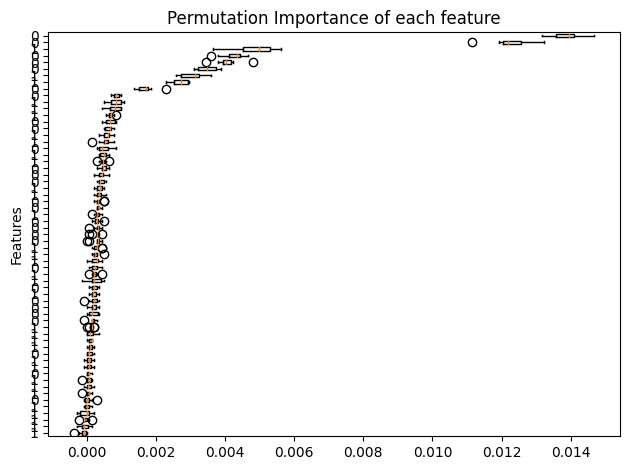

In [ ]:

from sklearn.inspection import permutation_importance
result = permutation_importance(rf, X, y, n_repeats=10, random_state=0, n_jobs=2)


# Plot the results
fig, ax = plt.subplots()
sorted_idx = result.importances_mean.argsort()
ax.boxplot(
    result.importances[sorted_idx].T, vert=False, labels=y[sorted_idx]
)
ax.set_title("Permutation Importance of each feature")
ax.set_ylabel("Features")
fig.tight_layout()
plt.show()

In [ ]:
y[sorted_idx]

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0])

## K-Nearest Neighbours

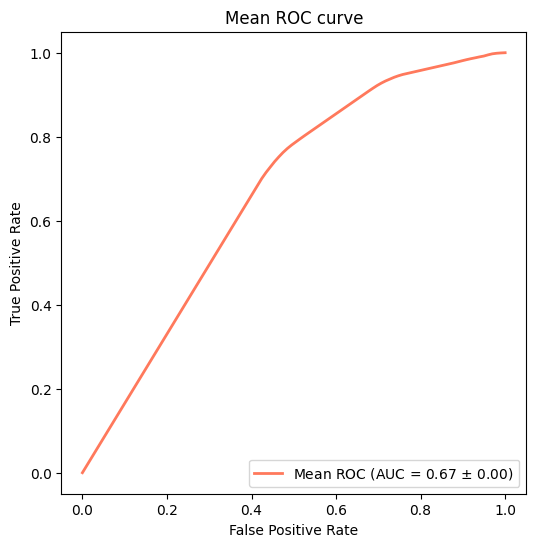

Mean F1 Score: 0.9397630850176617
Mean Accuracy: 0.887458688692468
Mean Precision: 0.9004615860902202
Mean Recall: 0.9826986033219199
Mean Specificity: 0.08783783783783784


<Figure size 600x600 with 0 Axes>

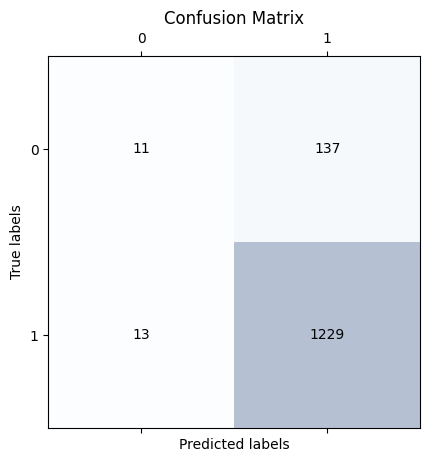

Fold 1     0.650706
Fold 2     0.642446
Fold 3     0.693475
Fold 4     0.647507
Fold 5     0.671487
Fold 6     0.691195
Fold 7     0.674590
Fold 8     0.624739
Fold 9     0.654872
Fold 10    0.715259
dtype: float64
The K-Nearest Neighbours Classifier model and metrics have been saved successfully.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc, f1_score, accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold
import joblib

# Assuming X and y are already defined and preprocessed
# X = ... # Your features
# y = ... # Your target variable

n_splits = 10
cv = StratifiedKFold(n_splits=n_splits)

classifier = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors

# Initialize lists to store metrics
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

# Initialize Series to store AUC of folds
AUC_collection = pd.Series(dtype=float)

# Initialize lists to store other metrics
f1_scores = []
accuracies = []
precisions = []
recalls = []
specificities = []

for fold, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X[train], y[train])
    y_pred = classifier.predict(X[test])
    y_proba = classifier.predict_proba(X[test])[:, 1]

    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y[test], y_proba)
    roc_auc = auc(fpr, tpr)
    interp_tpr = np.interp(mean_fpr, fpr, tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(roc_auc)

    # Store AUC in Series
    AUC_collection[f'Fold {fold+1}'] = roc_auc

    # Compute other metrics
    f1_scores.append(f1_score(y[test], y_pred))
    accuracies.append(accuracy_score(y[test], y_pred))
    precisions.append(precision_score(y[test], y_pred))
    recalls.append(recall_score(y[test], y_pred))
    tn, fp, fn, tp = confusion_matrix(y[test], y_pred).ravel()
    specificity = tn / (tn+fp)
    specificities.append(specificity)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)

plt.figure(figsize=(6, 6))
plt.plot(mean_fpr, mean_tpr, color='#FF5733',
         #label=r'Mean ROC (AUC = %0.2f)' % (mean_auc),
         label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
         lw=2, alpha=0.8)
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
# ax.fill_between(
#     mean_fpr,
#     tprs_lower,
#     tprs_upper,
#     color="grey",
#     alpha=0.2,
#     label=r"$\pm$ 1 std. dev.",
# )
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Mean ROC curve')
plt.legend(loc='lower right')
plt.show()

# Print the metrics
print(f'Mean F1 Score: {np.mean(f1_scores)}')
print(f'Mean Accuracy: {np.mean(accuracies)}')
print(f'Mean Precision: {np.mean(precisions)}')
print(f'Mean Recall: {np.mean(recalls)}')
print(f'Mean Specificity: {np.mean(specificities)}')

# Display the confusion matrix for the last fold
cm = confusion_matrix(y[test], y_pred)
plt.figure(figsize=(6, 6))
plt.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(x=j, y=i, s=cm[i, j], va='center', ha='center')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Print AUC collection
print(AUC_collection)

# Save the trained model to a file
joblib.dump(classifier, 'KNN_model.joblib')

# Save other metrics to a dictionary
metrics = {
    'AUC_collection': AUC_collection,
    'Mean F1 Score': np.mean(f1_scores),
    'Mean Accuracy': np.mean(accuracies),
    'Mean Precision': np.mean(precisions),
    'Mean Recall': np.mean(recalls),
    'Mean Specificity': np.mean(specificities)
}

# Save the metrics dictionary to a file
joblib.dump(metrics, 'KNN_metrics.joblib')

# Print a success message
print("The K-Nearest Neighbours Classifier model and metrics have been saved successfully.")


## Neural Network

In [ ]:
pip install tensorflow

18/18 [==============================] - 0s 2ms/step


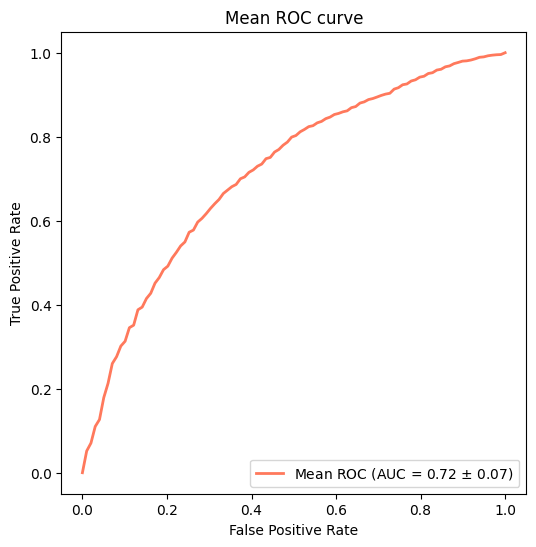

Mean F1 Score: 0.8280356232902426
Mean Accuracy: 0.7250124839604812
Mean Precision: 0.7667004559967714
Mean Recall: 0.9007869157790582
Mean Specificity: 0.23310810810810811


<Figure size 600x600 with 0 Axes>

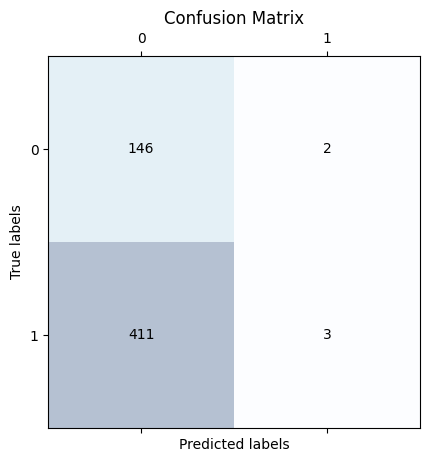

Fold 1     0.650293
Fold 2     0.697395
Fold 3     0.808297
Fold 4     0.671351
Fold 5     0.589388
Fold 6     0.711842
Fold 7     0.713515
Fold 8     0.838344
Fold 9     0.733541
Fold 10    0.747609
dtype: float64
The Neural Network model and AUC collection have been saved successfully.


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import joblib

# Assuming X and y are already defined and preprocessed
# X = ... # Your features
# y = ... # Your target variable, needs to be one-hot encoded for neural network
# y = to_categorical(y)

n_splits = 10
cv = StratifiedKFold(n_splits=n_splits)

# Define a simple neural network model
def create_model(input_dim):
    model = Sequential()
    model.add(Dense(64, input_dim=input_dim, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(2, activation='softmax'))  # Use '2' for binary classification
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# One-hot encode the target variable 'y'
y_one_hot = to_categorical(y)

# Initialize lists to store metrics
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

# Initialize Series to store AUC of folds
AUC_collection = pd.Series(dtype=float)

for fold, (train, test) in enumerate(cv.split(X, y)):
    model = create_model(X.shape[1])
    model.fit(X[train], y_one_hot[train], epochs=50, batch_size=32, verbose=0)

    # Predict probabilities and classes
    y_pred_proba = model.predict(X[test])
    y_pred = np.argmax(y_pred_proba, axis=1)

    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y[test], y_pred_proba[:, 1])
    roc_auc = auc(fpr, tpr)
    interp_tpr = np.interp(mean_fpr, fpr, tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(roc_auc)

    # Store AUC in Series
    AUC_collection[f'Fold {fold+1}'] = roc_auc

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)

# Plotting and other metrics calculations remain the same
plt.figure(figsize=(6, 6))
plt.plot(mean_fpr, mean_tpr, color='#FF5733',
         #label=r'Mean ROC (AUC = %0.2f)' % (mean_auc),
         label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
         lw=2, alpha=0.8)
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
# ax.fill_between(
#     mean_fpr,
#     tprs_lower,
#     tprs_upper,
#     color="grey",
#     alpha=0.2,
#     label=r"$\pm$ 1 std. dev.",
# )
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Mean ROC curve')
plt.legend(loc='lower right')
plt.show()

# Print the metrics
print(f'Mean F1 Score: {np.mean(f1_scores)}')
print(f'Mean Accuracy: {np.mean(accuracies)}')
print(f'Mean Precision: {np.mean(precisions)}')
print(f'Mean Recall: {np.mean(recalls)}')
print(f'Mean Specificity: {np.mean(specificities)}')

# Display the confusion matrix for the last fold
cm = confusion_matrix(y[test], y_pred)
plt.figure(figsize=(6, 6))
plt.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(x=j, y=i, s=cm[i, j], va='center', ha='center')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Print AUC collection
print(AUC_collection)

# Save the trained model to a file
joblib.dump(classifier, 'KNN_model.joblib')

# Save other metrics to a dictionary
metrics = {
    'AUC_collection': AUC_collection,
    'Mean F1 Score': np.mean(f1_scores),
    'Mean Accuracy': np.mean(accuracies),
    'Mean Precision': np.mean(precisions),
    'Mean Recall': np.mean(recalls),
    'Mean Specificity': np.mean(specificities)
}

# Save the trained model to a file
model.save('NN_model.h5')  # Save the model in HDF5 file format

# Save AUC collection to a file
joblib.dump(AUC_collection, 'NN_AUC_collection.joblib')

# Print a success message
print("The Neural Network model and AUC collection have been saved successfully.")


## XGB model

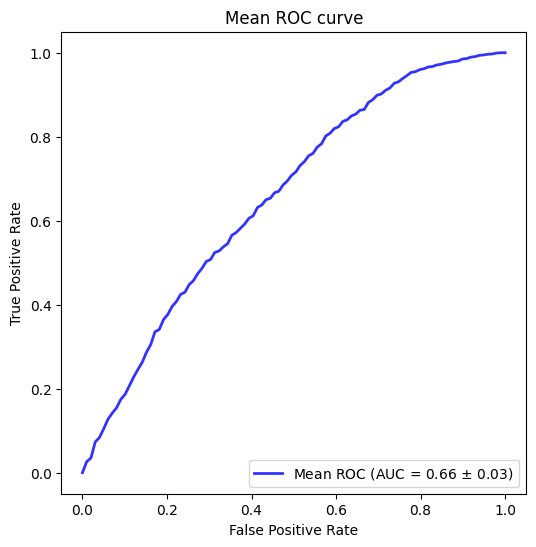

Mean F1 Score: 0.9438304858430543
Mean Accuracy: 0.8936430496149448
Mean Precision: 0.8936354358355579
Mean Recall: 1.0
Mean Specificity: 0.0006756756756756757


<Figure size 600x600 with 0 Axes>

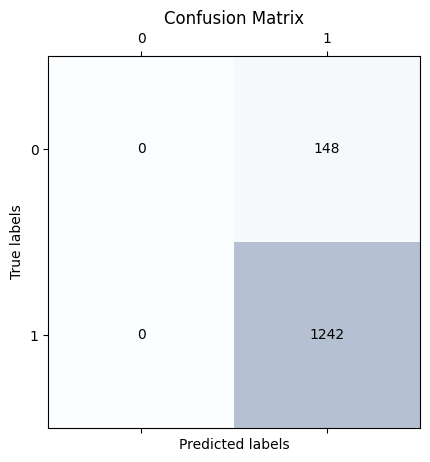

Fold 1     0.689543
Fold 2     0.654585
Fold 3     0.687162
Fold 4     0.654147
Fold 5     0.630906
Fold 6     0.658759
Fold 7     0.637681
Fold 8     0.622867
Fold 9     0.641016
Fold 10    0.702240
dtype: float64
The SVM model and metrics have been saved successfully.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc, f1_score, accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold
import joblib

# Assuming X and y are already defined and preprocessed
# X = ... # Your features
# y = ... # Your target variable

n_splits = 10
cv = StratifiedKFold(n_splits=n_splits)

classifier = SVC(probability=True)

# Initialize lists to store metrics
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

# Initialize Series to store AUC of folds
AUC_collection = pd.Series(dtype=float)

# Initialize lists to store other metrics
f1_scores = []
accuracies = []
precisions = []
recalls = []
specificities = []

for fold, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X[train], y[train])
    y_pred = classifier.predict(X[test])
    y_proba = classifier.predict_proba(X[test])[:, 1]

    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y[test], y_proba)
    roc_auc = auc(fpr, tpr)
    interp_tpr = np.interp(mean_fpr, fpr, tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(roc_auc)

    # Store AUC in Series
    AUC_collection[f'Fold {fold+1}'] = roc_auc

    # Compute other metrics
    f1_scores.append(f1_score(y[test], y_pred))
    accuracies.append(accuracy_score(y[test], y_pred))
    precisions.append(precision_score(y[test], y_pred))
    recalls.append(recall_score(y[test], y_pred))
    tn, fp, fn, tp = confusion_matrix(y[test], y_pred).ravel()
    specificity = tn / (tn+fp)
    specificities.append(specificity)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)

plt.figure(figsize=(6, 6))
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
         lw=2, alpha=0.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Mean ROC curve')
plt.legend(loc='lower right')
plt.show()

# Print the metrics
print(f'Mean F1 Score: {np.mean(f1_scores)}')
print(f'Mean Accuracy: {np.mean(accuracies)}')
print(f'Mean Precision: {np.mean(precisions)}')
print(f'Mean Recall: {np.mean(recalls)}')
print(f'Mean Specificity: {np.mean(specificities)}')

# Display the confusion matrix for the last fold
cm = confusion_matrix(y[test], y_pred)
plt.figure(figsize=(6, 6))
plt.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(x=j, y=i, s=cm[i, j], va='center', ha='center')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Print AUC collection
print(AUC_collection)

# Save the trained model to a file
joblib.dump(classifier, 'SVM_model.joblib')

# Save other metrics to a dictionary
metrics = {
    'AUC_collection': AUC_collection,
    'Mean F1 Score': np.mean(f1_scores),
    'Mean Accuracy': np.mean(accuracies),
    'Mean Precision': np.mean(precisions),
    'Mean Recall': np.mean(recalls),
    'Mean Specificity': np.mean(specificities)
}

# Save the metrics dictionary to a file
joblib.dump(metrics, 'SVM_metrics.joblib')

# Print a success message
print("The SVM model and metrics have been saved successfully.")


# Combination of mutiple curves

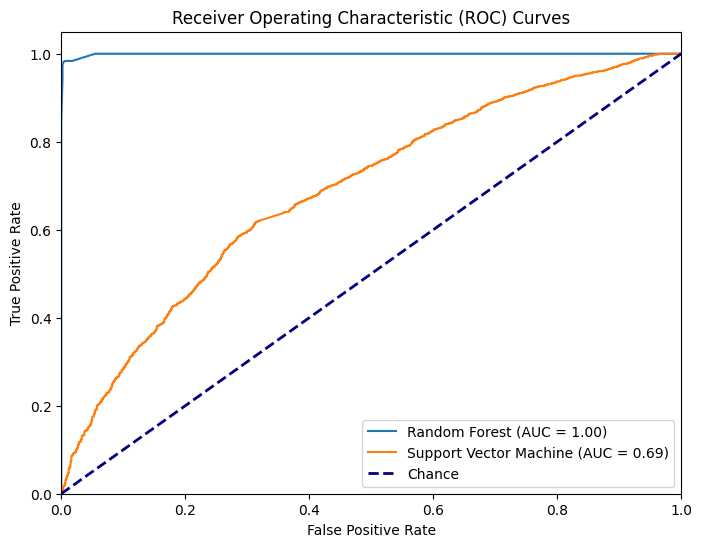

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import joblib

# Load the stored models
rfc_model = joblib.load('RFC_model.joblib')
svm_model = joblib.load('SVM_model.joblib')
# other_model_2 = joblib.load('other_model_2.joblib')
# ... load other models as needed

# Assuming you have the true labels and the test features
true_labels = y
test_features = X

# Predict probabilities for the test set using the loaded models
rfc_proba = rfc_model.predict_proba(test_features)[:, 1]
svm_proba = svm_model.predict_proba(test_features)[:, 1]
# proba_other_model_2 = other_model_2.predict_proba(test_features)[:, 1]
# ... predict probabilities for other models

# Compute ROC curve and AUC for each model
fpr_rfc, tpr_rfc, _ = roc_curve(true_labels, rfc_proba)
auc_rfc = auc(fpr_rfc, tpr_rfc)

fpr_svm, tpr_svm, _ = roc_curve(true_labels, svm_proba)
auc_svm = auc(fpr_svm, tpr_svm)

# fpr_other_model_2, tpr_other_model_2, _ = roc_curve(true_labels, proba_other_model_2)
# auc_other_model_2 = auc(fpr_other_model_2, tpr_other_model_2)

# ... compute ROC and AUC for other models

# Initialize plot
plt.figure(figsize=(8, 6))

# Plot ROC curve for each model
plt.plot(fpr_rfc, tpr_rfc, label=f'Random Forest (AUC = {auc_rfc:.2f})')
plt.plot(fpr_svm, tpr_svm, label=f'Support Vector Machine (AUC = {auc_svm:.2f})')
# plt.plot(fpr_other_model_2, tpr_other_model_2, label=f'Other Model 2 (AUC = {auc_other_model_2:.2f})')
# ... plot ROC for other models

# Plot the random chance line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Chance')

# Customize the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')
plt.show()
